In [1]:
from __future__ import division

from datetime import datetime
from functools import wraps
import itertools

import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import pandas as pd
import statsmodels.api as sm

import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('moscheedaten.csv', parse_dates={'date': [3]})
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head()

,date,Jahr,Monat,Tag,Ort,Verband,Gemeinde,Anteil Muslime im Ort,Bundesland,Straftat,...,Paragraph StGB,Paragraph StGB II,Unnamed: 14,Beschreibung,Tatverdächtige,Strafmaß,Phänomenbereich,Naziparteien kandidieren?,Quelle,Unnamed: 21
0,2015-06-24,2015,6,24,München,NaN,Haci-Bayram-Moschee,NaN,Bayern,Brandanschlag,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medien,NaN
1,2015-05-10,2015,5,10,Augsburg,NaN,Islamischer Verein,NaN,Bayern,Sachbeschädigung,...,303,NaN,NaN,Unbekannter besprühte Außemauer der Moschee mi...,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-04-21,2015,4,21,Dresden,NaN,Islamisches Zentrum Dresden e. V.,NaN,Sachsen,Besonders schwerer Fall des Diebstahls,...,243,NaN,NaN,Am 21. April drang ein unbekannter Täter in da...,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-03-20,2015,3,20,Meßkirch,NaN,NaN,NaN,Baden-Württemberg,Sachbeschädigung,...,303,NaN,NaN,NaN,NaN,NaN,rechts,NaN,BW IM,NaN
4,2015-02-21,2015,2,21,Alpirsbach,NaN,NaN,NaN,Baden-Württemberg,Sachbeschädigung,...,303,NaN,NaN,NaN,NaN,NaN,sonstiges,NaN,BW IM,NaN


In [3]:
len(df)

617

In [4]:
df.Bundesland.value_counts()

Niedersachsen             157
Nordrhein-Westfalen       134
Baden-Württemberg          83
Bayern                     55
Sachsen                    42
Berlin                     40
Rheinland-Pfalz            24
Hessen                     22
Hamburg                    11
Schleswig-Holstein         10
Thüringen                  10
Saarland                    9
Sachsen-Anhalt              9
Bremen                      7
Mecklenburg-Vorpommern      2
Name: Bundesland, dtype: int64

In [5]:
df.groupby([df.date.dt.year, 'Bundesland']).size().sort_values(ascending=False)

date  Bundesland            
2006  Nordrhein-Westfalen       20
2011  Nordrhein-Westfalen       15
2001  Nordrhein-Westfalen       14
2008  Nordrhein-Westfalen       14
2012  Baden-Württemberg         12
2007  Nordrhein-Westfalen       12
2001  Baden-Württemberg         11
2008  Niedersachsen             11
2013  Niedersachsen             10
2009  Nordrhein-Westfalen       10
2010  Nordrhein-Westfalen        9
2014  Bayern                     9
      Sachsen                    9
2012  Bayern                     9
2013  Sachsen                    9
2010  Berlin                     8
2004  Baden-Württemberg          8
2012  Nordrhein-Westfalen        8
2009  Niedersachsen              8
2014  Niedersachsen              8
2013  Nordrhein-Westfalen        7
2002  Baden-Württemberg          7
2012  Niedersachsen              7
2014  Nordrhein-Westfalen        7
2008  Baden-Württemberg          7
2010  Baden-Württemberg          7
2013  Berlin                     7
2009  Sachsen             

In [6]:
df[df[u'Ort'].str.contains('Leipzig')]

,date,Jahr,Monat,Tag,Ort,Verband,Gemeinde,Anteil Muslime im Ort,Bundesland,Straftat,...,Paragraph StGB,Paragraph StGB II,Unnamed: 14,Beschreibung,Tatverdächtige,Strafmaß,Phänomenbereich,Naziparteien kandidieren?,Quelle,Unnamed: 21
10,2015-01-08,2015,1,8,Leipzig,NaN,Islamisches Kulturzentrum Bosniaken,NaN,Sachsen,Besonders schwerer Fall des Diebstahls,...,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2014-12-29,2014,12,29,Leipzig,NaN,Islamisches Kulturzentrum Bosniaken,NaN,Sachsen,Diebstahl,...,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2014-12-05,2014,12,5,Leipzig,NaN,Takva Moschee,NaN,Sachsen,Sachbeschädigung,...,303,NaN,NaN,Im Hinterhof insgesamt drei Mülltonnen durch B...,NaN,NaN,Sonstiges,NaN,18/4269,NaN
29,2014-10-19,2014,10,19,Leipzig,NaN,Al-Rahman Moscheeverein e. V.,NaN,Sachsen,Sachbeschädigung,...,303,NaN,NaN,In der Zeit vom 18. bis 19. wurde der Briefkas...,NaN,NaN,NaN,NaN,NaN,NaN
40,2014-10-03,2014,10,3,Leipzig,NaN,Al-Rahman Moscheeverein e. V.,NaN,Sachsen,Hausfriedensbruch,...,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,2014-08-20,2014,8,20,Leipzig,NaN,NaN,NaN,Sachsen,Verstoß gegen das Versammlungsgestz,...,VERSG,NaN,NaN,NaN,NaN,NaN,rechts,NaN,18/4269,NaN
65,2014-04-16,2014,4,16,Leipzig,NaN,NaN,NaN,Sachsen,Nötigung,...,240,NaN,NaN,NaN,NaN,NaN,rechts,NaN,18/4269,NaN
82,2013-11-14,2013,11,14,Leipzig,NaN,Gelände geplanter Ahmadiyya-Moschee,NaN,Sachsen,Sachbeschädigung,...,303,NaN,NaN,NaN,NaN,NaN,Sonstiges,NaN,"18/1627, http://www.taz.de/!5054873/",NaN
84,2013-11-05,2013,11,5,Leipzig,NaN,NaN,NaN,Sachsen,Störung des öffentlichen Friedens durch Androh...,...,126,NaN,NaN,NaN,NaN,NaN,rechts,NaN,"18/1627, IM auf Anfrage",NaN
85,2013-11-01,2013,11,1,Leipzig,NaN,NaN,NaN,Sachsen,Verstoß gegen das Versammlungsgesetz,...,VERSG,NaN,NaN,NaN,NaN,NaN,rechts,NaN,18/1627,NaN


In [7]:
df.groupby('Paragraph StGB').size().sort_values(ascending=False)

Paragraph StGB
303      129
86a      101
130       53
306       37
304       32
166       31
241       26
126       22
243       21
306a      18
242       17
123       15
185       14
167       10
308        4
104        4
?          4
224        4
VERSG      2
30         2
306b       2
90a        2
211        1
186        1
223        1
240        1
242a       1
131        1
26         1
120        1
103        1
dtype: int64

## auf einen blick: wie hat sich die absolute zahl der anschläge projahr und monat geändert? hat sie im verlauf dieses zeitraums zu- oder abgenommen?

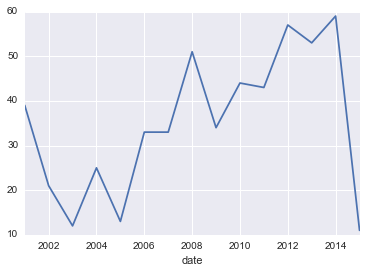

In [8]:
# Pro Jahr
df.set_index('date')['Tag'].resample('A', how=len).plot()

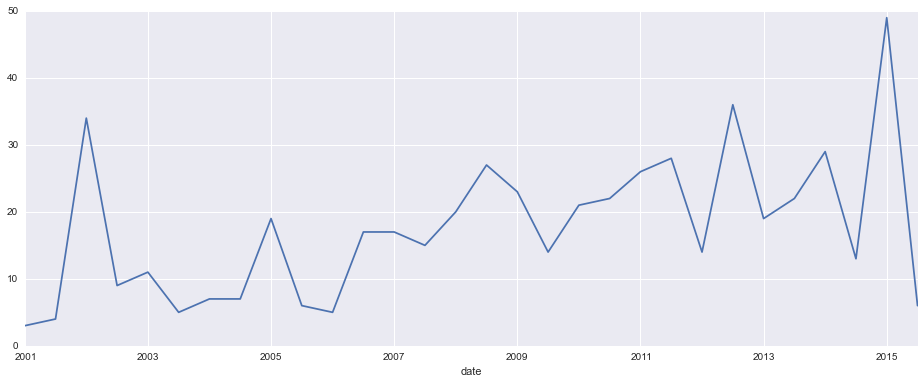

In [9]:
# Pro Monat
plt.figure(figsize=(16, 6))
df.set_index('date')['Tag'].resample('6M', how=len).plot()

## "hitliste": an welchen orten gab es die meisten anschläge?

In [10]:
df.groupby(u'Ort').size().sort_values(ascending=False)

Ort
Berlin                     40
Hannover                   23
Leipzig                    22
Köln                       13
Braunschweig               12
Hamburg                    11
Göttingen                   9
Wolfenbüttel                8
Dresden                     8
Osnabrück                   7
Halle (Saale)               7
Erfurt                      7
Duisburg                    7
Hilden                      6
Plauen                      6
Stadthagen                  6
München                     6
Dortmund                    6
Wolfsburg                   6
Lehrte                      5
Goslar                      5
Nordhorn                    5
Konstanz                    5
Leverkusen                  5
Düsseldorf                  5
Bremen                      5
Delmenhorst                 5
Dingolfing                  4
Ludwigshafen                4
Wilhelmshaven               4
                           ..
Gütersloh                   1
Sankt Ingbert               1
Greven

## "hitliste": welche moscheen wurden am häufigsten angegriffen?

In [11]:
df.groupby(['Ort', 'Gemeinde']).size().sort_values(ascending=False).head(20)

Ort            Gemeinde                                                           
Leipzig        Al-Rahman Moscheeverein e. V.                                          10
Halle (Saale)  Islamische Gemeinde Halle/Saale, Am Meeresbrunnen 3                     7
Plauen         Vogtländisch-Islamisches Zentrum Al-Muhadjirin                          5
Berlin         Sehitlik Märtyrer-Moschee, Columbiadamm 28                              4
Hannover       Islamisches Familienzentrum, Escherstr. 8                               4
Berlin         Ahmadiyya-Moschee                                                       3
Rheinfelden    Türkische Moschee, Schafmattstr. 2                                      3
Berlin         Sehitlik-Moschee                                                        3
Braunschweig   DITIB-Moschee, Ludwigstr. 23A                                           3
               Deutschsprachiger Muslimkreis, Reichsstr. 5-6                           3
Göttingen      Türkisch Isl

## "hitliste": in welchen bundesländern gab es die meisten anschläge?

In [12]:
df.groupby('Bundesland').size().sort_values(ascending=False)

Bundesland
Niedersachsen             157
Nordrhein-Westfalen       134
Baden-Württemberg          83
Bayern                     55
Sachsen                    42
Berlin                     40
Rheinland-Pfalz            24
Hessen                     22
Hamburg                    11
Thüringen                  10
Schleswig-Holstein         10
Sachsen-Anhalt              9
Saarland                    9
Bremen                      7
Mecklenburg-Vorpommern      2
dtype: int64

## "hitliste": welche delikte kamen wie oft vor? (drohung, brandanschlag etc)

In [13]:
df.groupby('Straftat').size().sort_values(ascending=False)

Straftat
Sachbeschädigung                                                                                                                  126
Verwenden von Kennzeichen verfassungswidriger Organisationen                                                                       68
Volksverhetzung                                                                                                                    54
Brandstiftung                                                                                                                      35
Bedrohung                                                                                                                          25
Gemeinschädliche Sachbeschädigung                                                                                                  23
Störung des öffentlichen Friedens durch Androhung von Straftaten                                                                   20
Besonders schwerer Fall des Diebstahls               

## verlauf für die orte mit den meisten anschlägen ("top-10")
wann erfolgten sie? haben sie zugenommen?

/Users/sw/.virtualenvs/notebook/lib/python2.7/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


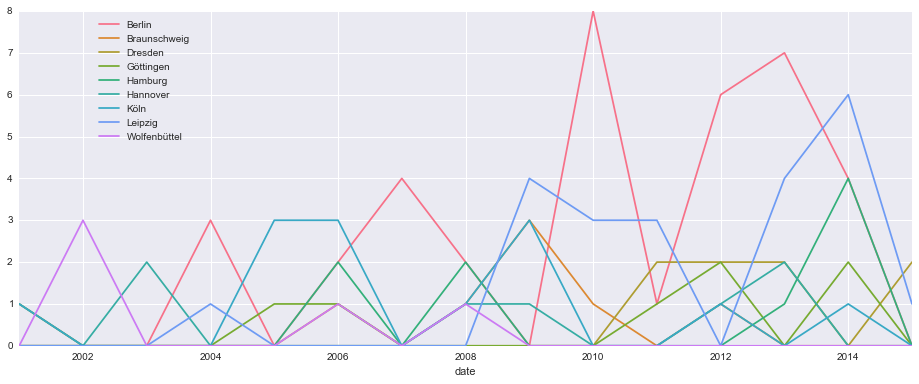

In [14]:
top_cities = df.groupby(u'Ort').size().sort_values(ascending=False).head(10)
fig = plt.figure('111', figsize=(16, 6))
ax = fig.add_subplot(111)
colors = sns.color_palette("husl", 10)
df[df.Ort.isin(top_cities.index)].groupby(['date', 'Ort']).size().unstack().fillna(0).resample('A', how='sum').plot(ax=ax, color=colors)
plt.legend(bbox_to_anchor=(0.2, 1))

## Verlauf für die moscheen mit den meisten anschlägen ("top-10")

wann erfolgten die meisten anschläge? haben sie zugenommen? (hier
tragen wir für die top-10-moscheen kurzbeschreibungen der delikte
zusammen, die dann nach möglichkeit in der grafik erscheinen)

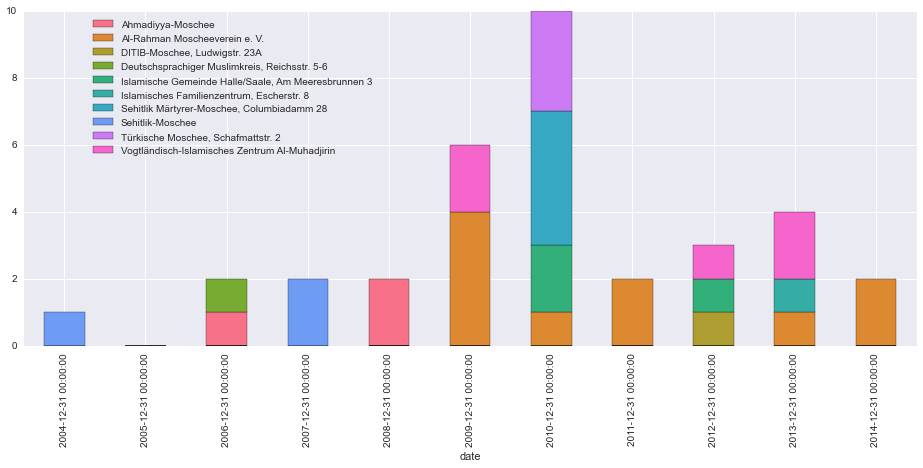

In [15]:
top_moscheen = df.groupby(['Ort', 'Gemeinde']).size().sort_values(ascending=False).head(10).reset_index()['Gemeinde']
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)
colors = sns.color_palette("husl", 10)
df[df.Gemeinde.isin(top_moscheen)].groupby(['date', 'Gemeinde']).size().unstack().fillna(0).resample('A', how='sum').plot(ax=ax, color=colors, kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(0.4, 1))

## Sortiertung nach quellen

wie viele anschläge gab die bundesregierung raus? wie viele kommen aus den ländern?

In [16]:
from collections import Counter
df['sources'] = df.Quelle.str.strip().str.split(',').dropna().apply(lambda x: [s.strip() for s in x])
all_sources = set()
df['sources'].dropna().apply(lambda x: all_sources.update(x))
# df.groupby('source').size().sort_values(ascending=False)

counter = Counter()
df['sources'].dropna().apply(lambda x: counter.update(x))
counter.most_common()

[('17/9523', 219),
 ('Piper 2011', 120),
 ('17/4027', 118),
 ('18/1627', 70),
 ('18/4269', 46),
 ('17/2047', 22),
 ('Berlin IM', 22),
 ('17/14735', 17),
 ('BW IM', 15),
 ('16/5414', 13),
 ('19/2038', 12),
 ('IM Sachsen-Anhalt auf Anfrage', 8),
 ('IM auf Anfrage', 6),
 ('LKA Th\xc3\xbcringen auf Anfrage', 6),
 ('Nieders. IM auf Anfrage', 4),
 ('15/1501', 3),
 ('19/52', 3),
 ('21/472', 3),
 ('Drucksache und IM auf Anfrage', 2),
 ('', 1),
 ('Berliner IM', 1),
 ('18/1627 und IM auf Anfrage', 1),
 ('http://www.taz.de/!5054873/', 1),
 ('Berline IM', 1),
 ('Medien', 1)]

## Wie viele delikte wurden aufgeklärt?

In [17]:
df['Strafmaß'].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        585
nicht aufgeklärt                                                                                                                                                                                                                                                                                                                                                                                                                         

## Wie viele delikte wurden rechtsmotivierter gewalt, etc. zugeordnet?

In [18]:
df['Phänomenbereich'].value_counts()

rechts                        301
nicht PMK                      82
Sonstiges                      70
Ausländer                      29
rechts (?)                      8
links                           4
Sonstiges, rechts               3
Sonstiges/Unbekannt             3
PMK                             2
Kurden                          1
Türken/Kurden                   1
Kurde                           1
Sonstige/Unbekannt              1
Sonstiges, nicht PMK            1
nicht bekannt                   1
?                               1
Sonstige                        1
rechts, nicht PMK               1
rechts/ Sonstige/Unbekannt      1
PMAK religiös motiviert         1
rechts?                         1
sonstiges                       1
Name: Phänomenbereich, dtype: int64

## Korrelationen

- a) gibt es orte mit über-/unterdurchschnittlich vielen anschläge auf
moscheen gemessen an der anzahl der moscheen in diesen orten?
    - Woher soll die Anzahl der Moscheen kommen?
- b) gibt es bundesländer mit über-/unterdurchschnittlich vielen anschläge auf moscheen gemessen an der gesamtzahl der moscheen im bundesland?
    - siehe a)
- c) sind anschläge auf moscheen in orten mit hoher arbeitslosigkeit
wahrscheinlicher? (bzw. häufiger)
    - TODO: Arbeitslosigkeit pro Ort (?) bzw. Kreis/kreisfreie Stadt besorgen
    - Welches Jahr? Jahr des Anschlags ausschlaggebend?
- d) sind anschläge auf moscheen in orten mit zustimmung zu rechten
parteien wahrscheinlicher? (bzw. häufiger)
    - Woher kommen diese Daten?
- f) welches bundesland hat die meisten anschläge gemesssen an der
muslimischen bevölkerung?
    - Woher kommt die Bevölkerungszahl?
- g) sind anschläge auf moscheen in bundesländern mit ausgeprägtem
armutsgefälle wahrscheinlicher (häufiger)?
    - Woher kommt das Armutsgefälle?
- h) sind anschläge auf moscheen in orten bzw. kreisen mit durchschnittlich hohem bruttoeinkommen wahrscheinlicher (häufiger)? Oder in orten/kreisen mit niedrigem bruttoeinkommen?
    - Woher kommt das Bruttoeinkommen?
- i) sind übergriffe in bundesländern mit hohem ausländeranteil
wahrscheinlicher (häufiger) oder im gegenteil in bundesländern mit
besonders niedrigem ausländeranteil?
    - Ausländeranteil?